In [2]:
from typing import Dict,TypedDict, List
import random
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    name : str
    number : List[int]
    counter : int


In [6]:
def greeting_node(state: AgentState) -> AgentState:
    """ Simple node that adds a greeting message to the state """
    state['name'] ="Hey" + state['name'] + " How are you?"
    state['counter'] = 0
    return state

def random_node(state: AgentState) -> AgentState:
    """ Generates a random number from 0-10"""
    state['number'].append(random.randint(0,10))
    state['counter'] +=1
    return state

def should_continue(state: AgentState) -> AgentState:
    """Function to decide what to do next"""
    if state['counter']<5:
        print("Entering Loop", state['counter'])
        return "loop"
    else:
        return "exit"

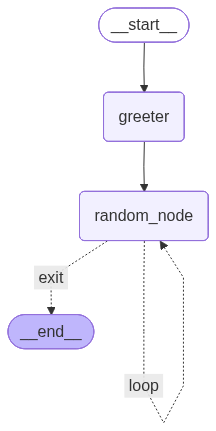

In [7]:
graph= StateGraph(AgentState)
graph.add_node("greeter", greeting_node)
graph.add_node("random_node", random_node)
graph.add_edge(START,"greeter")
graph.add_edge("greeter","random_node")
graph.add_conditional_edges(
    "random_node",
    should_continue,
    {
        "loop" : "random_node",
        "exit" : END
    }

)

app=graph.compile()
app

In [8]:
result=app.invoke({"name":"bob","number":[],"counter":-1})
result

Entering Loop 1
Entering Loop 2
Entering Loop 3
Entering Loop 4


{'name': 'Heybob How are you?', 'number': [8, 6, 2, 9, 10], 'counter': 5}